### 3 Dimensional Array Manipulations and Equalization

In [2]:
### Run below if necessary

##import sys

##sys.path.append('/usr/local/lib/python2.7/site-packages')

import math
import csv,gc
import matplotlib
import numpy as np
import cv2

#%matplotlib
BINS = 32

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from skimage import data, img_as_float
from skimage import exposure

In [4]:
import cv2
import nibabel as nb

In [2]:
from PCV import tools
from PIL import Image
from numpy import *

def histeq(im,nbr_bins=256):
    """    Histogram equalization of a grayscale image. """
    
    # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    
    return im2.reshape(im.shape), cdf

In [3]:
im = nb.load('Fear197.nii')
im = im.get_data()
img = im[:,:,:,0]

NameError: name 'nb' is not defined

In [16]:
a = np.random.randint(0,10,(6,7,8)) 
print a

[[[8 2 7 3 3 8 0 1]
  [9 4 9 6 7 2 1 8]
  [7 7 2 7 4 6 1 5]
  [4 4 7 4 6 4 9 2]
  [4 8 8 6 7 3 4 0]
  [6 7 3 2 4 3 7 3]
  [4 5 4 3 0 3 4 9]]

 [[6 7 4 8 9 0 6 5]
  [4 9 6 7 5 3 5 8]
  [9 6 3 7 7 3 3 3]
  [3 5 0 5 9 3 7 3]
  [4 8 2 9 6 3 2 4]
  [3 2 6 1 3 7 1 5]
  [8 8 3 0 3 7 2 4]]

 [[6 1 5 2 7 7 4 3]
  [2 0 0 7 6 8 4 7]
  [3 4 1 8 7 1 1 5]
  [8 9 3 1 7 1 6 5]
  [2 3 2 4 8 7 7 8]
  [2 8 0 5 9 5 6 0]
  [2 0 1 9 7 1 7 9]]

 [[9 6 8 0 8 2 7 9]
  [3 9 0 7 6 5 3 3]
  [0 7 4 7 4 8 2 2]
  [4 8 0 5 1 8 7 5]
  [9 1 5 1 2 2 5 9]
  [6 5 3 4 2 2 5 0]
  [3 5 4 1 0 6 4 6]]

 [[7 2 2 2 1 1 9 4]
  [9 8 9 5 9 9 5 3]
  [6 6 3 0 3 8 3 3]
  [0 6 7 3 9 4 2 4]
  [1 1 3 3 2 2 4 2]
  [9 5 7 3 2 4 3 9]
  [1 4 6 2 7 2 9 9]]

 [[4 1 9 2 8 7 8 8]
  [6 9 2 8 6 8 7 4]
  [6 4 7 5 4 5 1 4]
  [4 6 0 7 1 7 9 5]
  [9 6 9 6 1 3 7 6]
  [2 1 7 7 5 0 7 9]
  [9 5 4 9 4 5 9 3]]]


In [17]:
print a[0]
print a[1]

[[8 2 7 3 3 8 0 1]
 [9 4 9 6 7 2 1 8]
 [7 7 2 7 4 6 1 5]
 [4 4 7 4 6 4 9 2]
 [4 8 8 6 7 3 4 0]
 [6 7 3 2 4 3 7 3]
 [4 5 4 3 0 3 4 9]]
[[6 7 4 8 9 0 6 5]
 [4 9 6 7 5 3 5 8]
 [9 6 3 7 7 3 3 3]
 [3 5 0 5 9 3 7 3]
 [4 8 2 9 6 3 2 4]
 [3 2 6 1 3 7 1 5]
 [8 8 3 0 3 7 2 4]]


In [18]:
print len(a) 
print len(a[0]) 
print len(a[0][0])

i=0
for row in img:
    i+=1
print i

j=0
for row in img:
    for row in row:
        j+=1
print j

6
7
8


NameError: name 'img' is not defined

In [19]:
aa = a.reshape(-1)
print aa
print aa.sum()

[8 2 7 3 3 8 0 1 9 4 9 6 7 2 1 8 7 7 2 7 4 6 1 5 4 4 7 4 6 4 9 2 4 8 8 6 7
 3 4 0 6 7 3 2 4 3 7 3 4 5 4 3 0 3 4 9 6 7 4 8 9 0 6 5 4 9 6 7 5 3 5 8 9 6
 3 7 7 3 3 3 3 5 0 5 9 3 7 3 4 8 2 9 6 3 2 4 3 2 6 1 3 7 1 5 8 8 3 0 3 7 2
 4 6 1 5 2 7 7 4 3 2 0 0 7 6 8 4 7 3 4 1 8 7 1 1 5 8 9 3 1 7 1 6 5 2 3 2 4
 8 7 7 8 2 8 0 5 9 5 6 0 2 0 1 9 7 1 7 9 9 6 8 0 8 2 7 9 3 9 0 7 6 5 3 3 0
 7 4 7 4 8 2 2 4 8 0 5 1 8 7 5 9 1 5 1 2 2 5 9 6 5 3 4 2 2 5 0 3 5 4 1 0 6
 4 6 7 2 2 2 1 1 9 4 9 8 9 5 9 9 5 3 6 6 3 0 3 8 3 3 0 6 7 3 9 4 2 4 1 1 3
 3 2 2 4 2 9 5 7 3 2 4 3 9 1 4 6 2 7 2 9 9 4 1 9 2 8 7 8 8 6 9 2 8 6 8 7 4
 6 4 7 5 4 5 1 4 4 6 0 7 1 7 9 5 9 6 9 6 1 3 7 6 2 1 7 7 5 0 7 9 9 5 4 9 4
 5 9 3]
1588


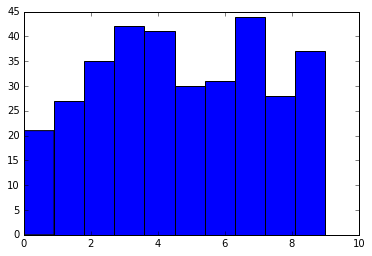

In [20]:
plt.hist(aa)
plt.show()

In [21]:
ahistnorm = aa*1.0/sum(aa)
print ahistnorm

[ 0.00503778  0.00125945  0.00440806  0.00188917  0.00188917  0.00503778
  0.          0.00062972  0.00566751  0.00251889  0.00566751  0.00377834
  0.00440806  0.00125945  0.00062972  0.00503778  0.00440806  0.00440806
  0.00125945  0.00440806  0.00251889  0.00377834  0.00062972  0.00314861
  0.00251889  0.00251889  0.00440806  0.00251889  0.00377834  0.00251889
  0.00566751  0.00125945  0.00251889  0.00503778  0.00503778  0.00377834
  0.00440806  0.00188917  0.00251889  0.          0.00377834  0.00440806
  0.00188917  0.00125945  0.00251889  0.00188917  0.00440806  0.00188917
  0.00251889  0.00314861  0.00251889  0.00188917  0.          0.00188917
  0.00251889  0.00566751  0.00377834  0.00440806  0.00251889  0.00503778
  0.00566751  0.          0.00377834  0.00314861  0.00251889  0.00566751
  0.00377834  0.00440806  0.00314861  0.00188917  0.00314861  0.00503778
  0.00566751  0.00377834  0.00188917  0.00440806  0.00440806  0.00188917
  0.00188917  0.00188917  0.00188917  0.00314861  0

<function matplotlib.pyplot.show>

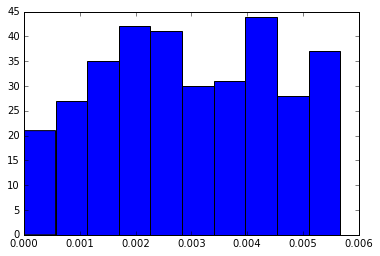

In [22]:
plt.hist(ahistnorm, bins = 10)
plt.show

Going back to the source code to perform histogram equalization

[[[8 2 7 3 3 8 0 1]
  [9 4 9 6 7 2 1 8]
  [7 7 2 7 4 6 1 5]
  [4 4 7 4 6 4 9 2]
  [4 8 8 6 7 3 4 0]
  [6 7 3 2 4 3 7 3]
  [4 5 4 3 0 3 4 9]]

 [[6 7 4 8 9 0 6 5]
  [4 9 6 7 5 3 5 8]
  [9 6 3 7 7 3 3 3]
  [3 5 0 5 9 3 7 3]
  [4 8 2 9 6 3 2 4]
  [3 2 6 1 3 7 1 5]
  [8 8 3 0 3 7 2 4]]

 [[6 1 5 2 7 7 4 3]
  [2 0 0 7 6 8 4 7]
  [3 4 1 8 7 1 1 5]
  [8 9 3 1 7 1 6 5]
  [2 3 2 4 8 7 7 8]
  [2 8 0 5 9 5 6 0]
  [2 0 1 9 7 1 7 9]]

 [[9 6 8 0 8 2 7 9]
  [3 9 0 7 6 5 3 3]
  [0 7 4 7 4 8 2 2]
  [4 8 0 5 1 8 7 5]
  [9 1 5 1 2 2 5 9]
  [6 5 3 4 2 2 5 0]
  [3 5 4 1 0 6 4 6]]

 [[7 2 2 2 1 1 9 4]
  [9 8 9 5 9 9 5 3]
  [6 6 3 0 3 8 3 3]
  [0 6 7 3 9 4 2 4]
  [1 1 3 3 2 2 4 2]
  [9 5 7 3 2 4 3 9]
  [1 4 6 2 7 2 9 9]]

 [[4 1 9 2 8 7 8 8]
  [6 9 2 8 6 8 7 4]
  [6 4 7 5 4 5 1 4]
  [4 6 0 7 1 7 9 5]
  [9 6 9 6 1 3 7 6]
  [2 1 7 7 5 0 7 9]
  [9 5 4 9 4 5 9 3]]]
 
[[8 2 7 3 3 8 0 1]
 [9 4 9 6 7 2 1 8]
 [7 7 2 7 4 6 1 5]
 [4 4 7 4 6 4 9 2]
 [4 8 8 6 7 3 4 0]
 [6 7 3 2 4 3 7 3]
 [4 5 4 3 0 3 4 9]]
[[6 7 4 8 9 

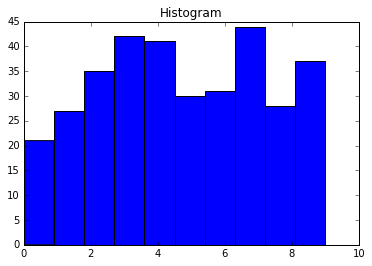

 
[ 0.00503778  0.00125945  0.00440806  0.00188917  0.00188917  0.00503778
  0.          0.00062972  0.00566751  0.00251889  0.00566751  0.00377834
  0.00440806  0.00125945  0.00062972  0.00503778  0.00440806  0.00440806
  0.00125945  0.00440806  0.00251889  0.00377834  0.00062972  0.00314861
  0.00251889  0.00251889  0.00440806  0.00251889  0.00377834  0.00251889
  0.00566751  0.00125945  0.00251889  0.00503778  0.00503778  0.00377834
  0.00440806  0.00188917  0.00251889  0.          0.00377834  0.00440806
  0.00188917  0.00125945  0.00251889  0.00188917  0.00440806  0.00188917
  0.00251889  0.00314861  0.00251889  0.00188917  0.          0.00188917
  0.00251889  0.00566751  0.00377834  0.00440806  0.00251889  0.00503778
  0.00566751  0.          0.00377834  0.00314861  0.00251889  0.00566751
  0.00377834  0.00440806  0.00314861  0.00188917  0.00314861  0.00503778
  0.00566751  0.00377834  0.00188917  0.00440806  0.00440806  0.00188917
  0.00188917  0.00188917  0.00188917  0.00314861 

<function matplotlib.pyplot.show>

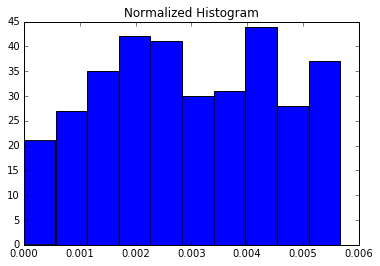

In [27]:
img = a

print img

print " "

print img[0]
print img[1]

print " "

imgflat = img.reshape(-1)
print imgflat
print imgflat.sum()

print " "
fig = plt.hist(imgflat, bins='auto')
plt.title('Histogram')
plt.show()

print " "

imgnorm = imgflat*1.0/sum(imgflat)
print imgnorm

fig = plt.hist(imgnorm, bins = 'auto')
plt.title('Normalized Histogram')
plt.show

In [28]:
import math

## Reminder of Z's values
print img

# Number of pixels
pixels = len(img) * len(img[0]) * len(img[0][0])
print "The number of pixels is {}".format(pixels)
## The output should be 4 since there are 4 numbers in this array

##Flatten method doesn't work because of tuple conversion later on
'''# Now we flatten Z
zz = z.reshape(-1)'''


# Initialize histogram and CDF
hist = {}
cdf = {}
norm_cdf = {}
## The range value should be be adjusted to the bin number
### In our case the range and bin number is obviously 10 
### since we generated numbers 1-10
BINS = 255

for i in range(BINS):
    hist[i] = 0
    cdf[i] = 0
    norm_cdf[i] = 0

# Create histogram


for row in img:
    for row in row:
        for val in row:
            hist[val] += 1

'''
for val in zz:
    hist[val] += 1
'''    


# Create cdf
for i in range(BINS):
    for j in range(i+1):
        cdf[i] += hist[j]
    norm_cdf[i] = int(math.floor(float(cdf[i]-1)/63*BINS))
    
print "The histogram values are {}".format(hist)
print "The cdf values are {}".format(cdf)
print "The normalized cdf values are {}".format(norm_cdf)

[[[8 2 7 3 3 8 0 1]
  [9 4 9 6 7 2 1 8]
  [7 7 2 7 4 6 1 5]
  [4 4 7 4 6 4 9 2]
  [4 8 8 6 7 3 4 0]
  [6 7 3 2 4 3 7 3]
  [4 5 4 3 0 3 4 9]]

 [[6 7 4 8 9 0 6 5]
  [4 9 6 7 5 3 5 8]
  [9 6 3 7 7 3 3 3]
  [3 5 0 5 9 3 7 3]
  [4 8 2 9 6 3 2 4]
  [3 2 6 1 3 7 1 5]
  [8 8 3 0 3 7 2 4]]

 [[6 1 5 2 7 7 4 3]
  [2 0 0 7 6 8 4 7]
  [3 4 1 8 7 1 1 5]
  [8 9 3 1 7 1 6 5]
  [2 3 2 4 8 7 7 8]
  [2 8 0 5 9 5 6 0]
  [2 0 1 9 7 1 7 9]]

 [[9 6 8 0 8 2 7 9]
  [3 9 0 7 6 5 3 3]
  [0 7 4 7 4 8 2 2]
  [4 8 0 5 1 8 7 5]
  [9 1 5 1 2 2 5 9]
  [6 5 3 4 2 2 5 0]
  [3 5 4 1 0 6 4 6]]

 [[7 2 2 2 1 1 9 4]
  [9 8 9 5 9 9 5 3]
  [6 6 3 0 3 8 3 3]
  [0 6 7 3 9 4 2 4]
  [1 1 3 3 2 2 4 2]
  [9 5 7 3 2 4 3 9]
  [1 4 6 2 7 2 9 9]]

 [[4 1 9 2 8 7 8 8]
  [6 9 2 8 6 8 7 4]
  [6 4 7 5 4 5 1 4]
  [4 6 0 7 1 7 9 5]
  [9 6 9 6 1 3 7 6]
  [2 1 7 7 5 0 7 9]
  [9 5 4 9 4 5 9 3]]]
The number of pixels is 336
The histogram values are {0: 21, 1: 27, 2: 35, 3: 42, 4: 41, 5: 30, 6: 31, 7: 44, 8: 28, 9: 37, 10: 0, 11: 0, 12: 0, 13:

[[[  2.00000000e+000   2.00000000e+000   2.12199579e-314   0.00000000e+000
     4.94065646e-324   0.00000000e+000   0.00000000e+000   0.00000000e+000]
  [ -8.89476941e+205   2.24783265e-314   2.21388946e-314   8.17079486e+097
     2.24883445e-314   2.21388946e-314   0.00000000e+000   0.00000000e+000]
  [  0.00000000e+000   1.23920719e-149   2.24794985e-314   2.21388946e-314
     0.00000000e+000   0.00000000e+000   0.00000000e+000  -1.69506615e+010]
  [  2.24783256e-314   2.21385056e-314   0.00000000e+000   0.00000000e+000
     0.00000000e+000   3.15023826e+144   2.24884762e-314   2.21385057e-314]
  [  0.00000000e+000   0.00000000e+000   0.00000000e+000   1.06615507e-217
     2.24886428e-314   2.21388946e-314   0.00000000e+000   0.00000000e+000]
  [  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
     8.77805240e+030   2.24885818e-314   6.95079640e-310   4.13957608e-098]
  [  2.24783253e-314   2.21388946e-314   7.56560098e-308   2.24775350e-314
     2.26914780e-31

<function matplotlib.pyplot.show>

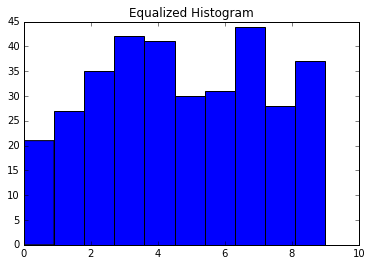

In [29]:
newimg = np.empty(img.shape)
## This should be the same exact dimensions as the original array

print newimg 
print img.shape

## set x_length to the first number, y_length to the second
x_length = img.shape[0]
y_length = img.shape[1]
z_length = img.shape[2]
print ''
print "XYZ lengths: "
print x_length, y_length, z_length


for i in range(x_length):
    for j in range(y_length):
        for k in range(z_length):
            newimg[i][j][k] = norm_cdf[ img[i][j][k] ]

print newimg

TwoDimg = img.reshape(-1)

fig = plt.hist(TwoDimg, bins = 'auto')
plt.title('Equalized Histogram')
plt.show



## This is wrong


Original subimage:

[[[8 2 7 3 3 8 0 1]
  [9 4 9 6 7 2 1 8]
  [7 7 2 7 4 6 1 5]
  [4 4 7 4 6 4 9 2]
  [4 8 8 6 7 3 4 0]
  [6 7 3 2 4 3 7 3]
  [4 5 4 3 0 3 4 9]]

 [[6 7 4 8 9 0 6 5]
  [4 9 6 7 5 3 5 8]
  [9 6 3 7 7 3 3 3]
  [3 5 0 5 9 3 7 3]
  [4 8 2 9 6 3 2 4]
  [3 2 6 1 3 7 1 5]
  [8 8 3 0 3 7 2 4]]

 [[6 1 5 2 7 7 4 3]
  [2 0 0 7 6 8 4 7]
  [3 4 1 8 7 1 1 5]
  [8 9 3 1 7 1 6 5]
  [2 3 2 4 8 7 7 8]
  [2 8 0 5 9 5 6 0]
  [2 0 1 9 7 1 7 9]]

 [[9 6 8 0 8 2 7 9]
  [3 9 0 7 6 5 3 3]
  [0 7 4 7 4 8 2 2]
  [4 8 0 5 1 8 7 5]
  [9 1 5 1 2 2 5 9]
  [6 5 3 4 2 2 5 0]
  [3 5 4 1 0 6 4 6]]

 [[7 2 2 2 1 1 9 4]
  [9 8 9 5 9 9 5 3]
  [6 6 3 0 3 8 3 3]
  [0 6 7 3 9 4 2 4]
  [1 1 3 3 2 2 4 2]
  [9 5 7 3 2 4 3 9]
  [1 4 6 2 7 2 9 9]]

 [[4 1 9 2 8 7 8 8]
  [6 9 2 8 6 8 7 4]
  [6 4 7 5 4 5 1 4]
  [4 6 0 7 1 7 9 5]
  [9 6 9 6 1 3 7 6]
  [2 1 7 7 5 0 7 9]
  [9 5 4 9 4 5 9 3]]]
 


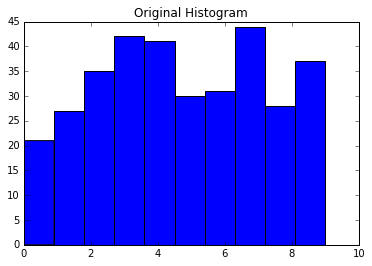



Equalized subimage:


[[[ 1206.   331.  1092.   501.   501.  1206.    80.   190.]
  [ 1355.   667.  1355.   914.  1092.   331.   190.  1206.]
  [ 1092.  1092.   331.  1092.   667.   914.   190.   789.]
  [  667.   667.  1092.   667.   914.   667.  1355.   331.]
  [  667.  1206.  1206.   914.  1092.   501.   667.    80.]
  [  914.  1092.   501.   331.   667.   501.  1092.   501.]
  [  667.   789.   667.   501.    80.   501.   667.  1355.]]

 [[  914.  1092.   667.  1206.  1355.    80.   914.   789.]
  [  667.  1355.   914.  1092.   789.   501.   789.  1206.]
  [ 1355.   914.   501.  1092.  1092.   501.   501.   501.]
  [  501.   789.    80.   789.  1355.   501.  1092.   501.]
  [  667.  1206.   331.  1355.   914.   501.   331.   667.]
  [  501.   331.   914.   190.   501.  1092.   190.   789.]
  [ 1206.  1206.   501.    80.   501.  1092.   331.   667.]]

 [[  914.   190.   789.   331.  1092.  1092.   667.   501.]
  [  331.    80.    80.  1092.   914.  1206.   667.  1092.]
  [  501.   

<function matplotlib.pyplot.show>

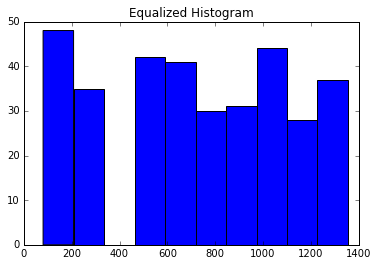

In [30]:
print ''
print 'Original subimage:'
print ''
imgflat = img.reshape(-1)
print img

print " "
fig = plt.hist(imgflat, bins='auto')
plt.title('Original Histogram')
plt.show()

print ''
print ''
print 'Equalized subimage:'
print ''

print ''
print newimg

TwoDimg = newimg.reshape(-1)

fig = plt.hist(TwoDimg, bins = 'auto')
plt.title('Equalized Histogram')
plt.show

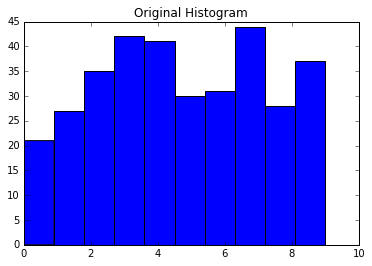

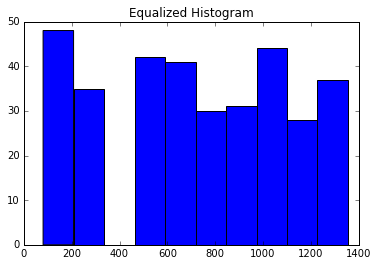

In [31]:
fig = plt.hist(imgflat, bins='auto')
plt.title('Original Histogram')
plt.show()

fig = plt.hist(TwoDimg, bins = 'auto')
plt.title('Equalized Histogram')
plt.show()

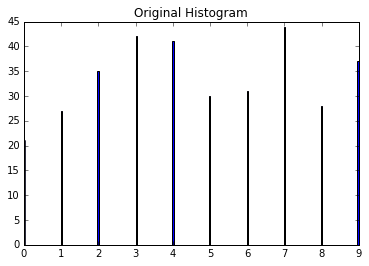

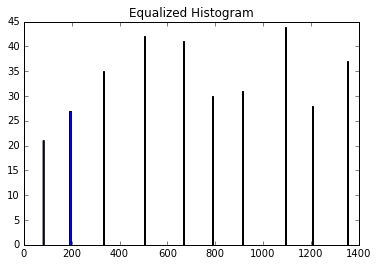

In [32]:
fig = plt.hist(imgflat, bins=255)
plt.title('Original Histogram')
plt.show()

fig = plt.hist(TwoDimg, bins = 255)
plt.title('Equalized Histogram')
plt.show()

In [33]:
print img
print ''
print newimg
print ''

flattenedimg, bin_edges1 = np.histogram(imgflat)
print imgflat
print flattenedimg
print ''

flattenednewimg, bin_edges2 = np.histogram(TwoDimg)
print TwoDimg
print flattenednewimg
print ''


[[[8 2 7 3 3 8 0 1]
  [9 4 9 6 7 2 1 8]
  [7 7 2 7 4 6 1 5]
  [4 4 7 4 6 4 9 2]
  [4 8 8 6 7 3 4 0]
  [6 7 3 2 4 3 7 3]
  [4 5 4 3 0 3 4 9]]

 [[6 7 4 8 9 0 6 5]
  [4 9 6 7 5 3 5 8]
  [9 6 3 7 7 3 3 3]
  [3 5 0 5 9 3 7 3]
  [4 8 2 9 6 3 2 4]
  [3 2 6 1 3 7 1 5]
  [8 8 3 0 3 7 2 4]]

 [[6 1 5 2 7 7 4 3]
  [2 0 0 7 6 8 4 7]
  [3 4 1 8 7 1 1 5]
  [8 9 3 1 7 1 6 5]
  [2 3 2 4 8 7 7 8]
  [2 8 0 5 9 5 6 0]
  [2 0 1 9 7 1 7 9]]

 [[9 6 8 0 8 2 7 9]
  [3 9 0 7 6 5 3 3]
  [0 7 4 7 4 8 2 2]
  [4 8 0 5 1 8 7 5]
  [9 1 5 1 2 2 5 9]
  [6 5 3 4 2 2 5 0]
  [3 5 4 1 0 6 4 6]]

 [[7 2 2 2 1 1 9 4]
  [9 8 9 5 9 9 5 3]
  [6 6 3 0 3 8 3 3]
  [0 6 7 3 9 4 2 4]
  [1 1 3 3 2 2 4 2]
  [9 5 7 3 2 4 3 9]
  [1 4 6 2 7 2 9 9]]

 [[4 1 9 2 8 7 8 8]
  [6 9 2 8 6 8 7 4]
  [6 4 7 5 4 5 1 4]
  [4 6 0 7 1 7 9 5]
  [9 6 9 6 1 3 7 6]
  [2 1 7 7 5 0 7 9]
  [9 5 4 9 4 5 9 3]]]

[[[ 1206.   331.  1092.   501.   501.  1206.    80.   190.]
  [ 1355.   667.  1355.   914.  1092.   331.   190.  1206.]
  [ 1092.  1092.   331.  10

<function matplotlib.pyplot.show>

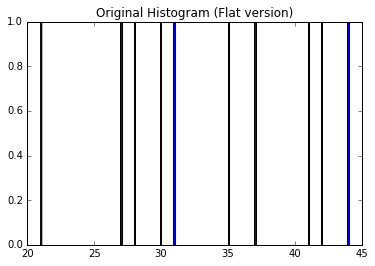

In [34]:
fig = plt.hist(flattenedimg, bins = 255)
plt.title('Original Histogram (Flat version)')
plt.show

<function matplotlib.pyplot.show>

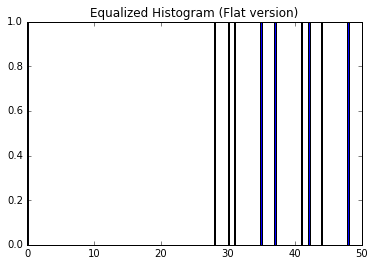

In [35]:
fig = plt.hist(flattenednewimg, bins = 255)
plt.title('Equalized Histogram (Flat version)')
plt.show